In [21]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import sys
import os

os.chdir(os.path.abspath(''))
sys.path.append(os.path.abspath(os.path.abspath('')))
sys.path.append(os.path.abspath(os.path.abspath('') + '/src'))

from utils import *
from models import *
from utils import *
from layers import *
from models import *

import pandas as pd
import numpy as np

import seaborn as sns
from ing_theme_matplotlib import mpl_style # pip install ing_theme_matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
from models import *

mpl.rcParams["figure.dpi"] = 100
mpl_style(dark=False)

In [2]:
ding = STALSTM(48, 16, 12, 5)

adj = torch.tensor([[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                    [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0],
                    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]]
        ).float()

norm_adj = adj/adj.sum(dim=-1).unsqueeze(-1)
deng = HSDSTM(adj=norm_adj,                  
                input_size=16,
                seq_len=48,
                num_channels=[16, 16],
                node_dim=1,
                dropout=0.1,
                num_levels=3,
                tau=12,
                num_quantiles=5)


deepar = DeepAR(
        d_input=16, 
        d_embedding=3, 
        n_embedding=[16, 32, 24], 
        d_model=30, 
        num_targets=1, 
        n_layers=3,
        dr=0.1
    )

mqrnn = MQRnn(
        d_input=16,
        d_embedding=1,
        n_embedding=[16, 32, 24],
        d_model=5,
        tau=12,
        num_targets=1,
        num_quantiles=5,
        n_layers=3,
        dr=0.1
    )

quanilte_levels = [0.1, 0.3, 0.5, 0.7, 0.9]

tft = TemporalFusionTransformer(
    d_model=30,
    d_embedding=5,
    cate_dims=[16, 32, 24],
    num_cv=16,
    seq_len=48,
    num_targets=1,
    tau=12,
    quantile=quanilte_levels,
    dr=0.1,
    device=device
)

sps = torch.tensor([ [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                    [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
                ).float()

instatran = InstaTran(
    d_model=20,
    d_embedding=3,
    cate_dims=[16, 32, 24],
    spatial_structure=sps,
    num_cv=16,
    seq_len=48,
    num_targets=1,
    tau=12,
    quantile=quanilte_levels,
    dr=0.1,
    device=device
) 

/opt/homebrew/Caskroom/miniforge/base/envs/ts/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [26]:
year = "2017"
deepar.load_state_dict(torch.load('../assets/ds/ds_DeepAR_{}_best.pth'.format(year), map_location='cpu'))
mqrnn.load_state_dict(torch.load('../assets/ds/ds_MQRnn_{}_best.pth'.format(year), map_location='cpu'))
tft.load_state_dict(torch.load('../assets/ds/ds_TFT_{}_best.pth'.format(year), map_location='cpu'))
ding.load_state_dict(torch.load('../assets/ds/ds_STALSTM_{}_best.pth'.format(year), map_location='cpu'))
deng.load_state_dict(torch.load('../assets/ds/ds_HSDSTM_{}_best.pth'.format(year), map_location='cpu'))
instatran.load_state_dict(torch.load('../assets/ds/ds_InstaTran_{}_best.pth'.format(year), map_location='cpu'))

<All keys matched successfully>

In [27]:
# for year in ["2016", "2017", "2018", "2019", "2020", "2021"]:
df_test_total = pd.read_csv("../data/df_test_total_ds_{}.csv".format(year))
df_merged = pd.read_csv("../data/df_merged_ds_{}.csv".format(year))

test_input, eval_label = generate_ts_data_for_deng(df_test_total, df_merged)
deng.eval()
eval_label = torch.tensor(eval_label)
deng_output = deng(torch.tensor(test_input))

print(torch.maximum(0.9 * (eval_label.squeeze() - deng_output[..., 4].squeeze()), (1-0.9)*(deng_output[..., 4].squeeze() -eval_label.squeeze() )).mean())
print(np.mean(eval_label.squeeze().cpu().numpy() < deng_output[..., 4].squeeze().detach().cpu().numpy()))
print(0.9 - np.mean(eval_label.squeeze().cpu().numpy() < deng_output[..., 4].squeeze().detach().cpu().numpy()))

print(torch.maximum(0.7 * (eval_label.squeeze() - deng_output[..., 3].squeeze()), (1-0.7)*(deng_output[..., 3].squeeze() -eval_label.squeeze() )).mean())
print(np.mean(eval_label.squeeze().cpu().numpy() < deng_output[..., 3].squeeze().detach().cpu().numpy()))
print(0.7 - np.mean(eval_label.squeeze().cpu().numpy() < deng_output[..., 3].squeeze().detach().cpu().numpy()))

print(torch.maximum(0.5 * (eval_label.squeeze() - deng_output[..., 2].squeeze()), (1-0.5)*(deng_output[..., 2].squeeze() -eval_label.squeeze() )).mean())
print(np.mean(eval_label.squeeze().cpu().numpy() < deng_output[..., 2].squeeze().detach().cpu().numpy()))
print(0.5 - np.mean(eval_label.squeeze().cpu().numpy() < deng_output[..., 2].squeeze().detach().cpu().numpy()))

tensor(0.1016, dtype=torch.float64, grad_fn=<MeanBackward0>)
0.9893790849673203
-0.08937908496732028
tensor(0.2913, dtype=torch.float64, grad_fn=<MeanBackward0>)
0.9934640522875817
-0.29346405228758177
tensor(0.5394, dtype=torch.float64, grad_fn=<MeanBackward0>)
0.9893790849673203
-0.4893790849673203


In [28]:
tft.load_state_dict(torch.load('../assets/ds/ds_TFT_{}_best.pth'.format(year), map_location='cpu'))

test_conti, test_cate, test_future, eval_label = generate_ts_data(df_test_total, df_merged, input_seq_len=48, tau=12)
tft.eval()

confe_output = tft.confe(torch.FloatTensor(test_conti)) # (batch_size, seq_len, num_cv, d_embedding)
catfe_output = tft.catfe(torch.LongTensor(test_cate))  # (batch_size, seq_len, num_cate, d_embedding)
obs_feature = torch.cat([confe_output, catfe_output], axis=-2)  # (batch_size, seq_len, num_cv + num_cate, d_embedding)
x1, tft_vsn_output  = tft.vsn1(obs_feature) # (batch_size, seq_len, d_model)

tft_output, _ = tft(torch.FloatTensor(test_conti), torch.LongTensor(test_cate), torch.LongTensor(test_future))

In [29]:
instatran.load_state_dict(torch.load('../assets/ds/ds_InstaTran_{}_best.pth'.format(year), map_location='cpu'))
instatran.eval()
stt_output, ssa_weight1, ssa_weight2, tsa_weight, dec_weights, fi1, fi2 = instatran(torch.FloatTensor(test_conti), torch.LongTensor(test_cate), torch.LongTensor(test_future))


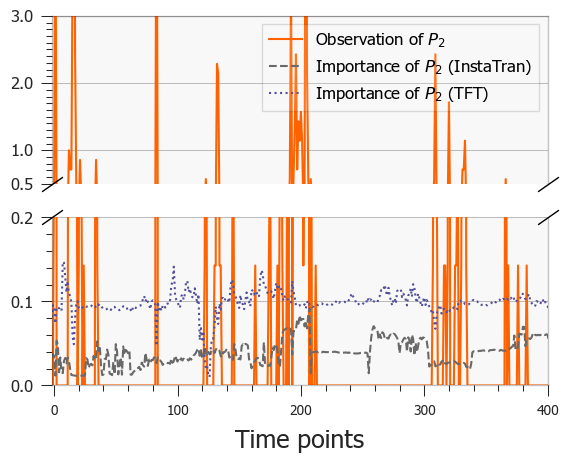

In [30]:
feature_idx = 1
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)

sns.lineplot(test_conti[::48, :, feature_idx].squeeze().reshape(-1)[30:], label=r"Observation of $P_2$", ax=ax1).set(xlabel="Time points")
sns.lineplot(test_conti[::48, :, feature_idx].squeeze().reshape(-1)[30:], label=r"Observation of $P_2$", ax=ax2)
sns.lineplot(fi1.detach().cpu()[::48, :, feature_idx, 0].reshape(-1)[30:], linestyle='--', label=r"Importance of $P_2$ (InstaTran)", ax=ax2)
sns.lineplot(tft_vsn_output.detach().cpu()[::48, :, feature_idx, 0].reshape(-1)[30:], linestyle=':', label=r"Importance of $P_2$ (TFT)", ax=ax2)

ax1.set_ylim(0.5, 3)
ax2.set_ylim(0, 0.2)
ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Time points")

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.get_legend().remove()
ax2.get_legend().remove()

d = .7    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.set_yticks([0.5, 1.0, 2.0, 3.0])
ax1.set_yticklabels(['0.5', '1.0', '2.0', '3.0'], fontsize = 12)

ax2.set_yticks([0.0, 0.1, 0.2])
ax2.set_yticklabels(['0.0', '0.1', '0.2'], fontsize = 12)

ax2.set_xticks([100 * i + 2 for i in range(15)])
ax2.set_xticklabels([str(100 * i) for i in range(15)] ,fontsize = 10)
ax2.xaxis.grid()

ax1.set_xlim(0, 402)
ax2.set_xlim(0, 402)
h,l = ax2.get_legend_handles_labels()
ax1.legend(handles=h, fontsize="12", loc='upper right', ncol=1)

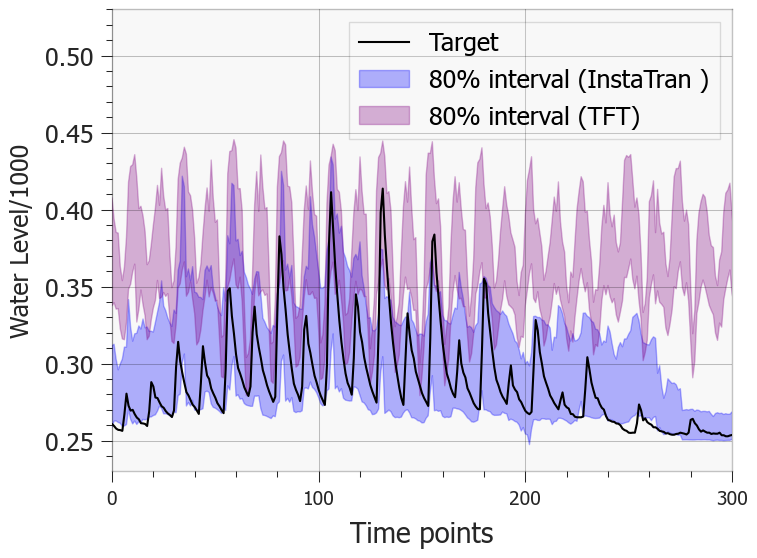

In [31]:

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#%%
B, tau, num_targets, quantiles = stt_output.shape

true = eval_label

if type(stt_output) == torch.Tensor:    
    preds = stt_output.detach().cpu().numpy()

preds_ = preds[::tau, ...].reshape(-1, num_targets, quantiles)
true_ = true[::tau, ...].reshape(-1, num_targets)
instatran_results = preds_[:, 0, :]

df_instatran_results = pd.DataFrame({"10%": instatran_results[:, 0],
                            "90%": instatran_results[:, 4],
                            "Target": true_[:, 0]}).reset_index().melt(id_vars=['index'])

palette = {
    'Target': 'white' if False else 'black'
}

forecasting_position = [tau * x for x in range(B // tau + 1)]

# fig, ax = plt.subplots()
# line = sns.lineplot(ax=ax, x='index', y='value', hue='variable', data=df_site1_past_pred, palette=palette)
# conf = ax.fill_between(np.arange(12), df_site1.loc[df_site1['variable'] == '10%', 'value'], df_site1.loc[df_site1['variable'] == '90%', 'value'], color='blue', alpha=0.3, label=r'80% interval')
# # sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
# ax.set(xlim=(-48, true.shape[0]), xlabel='Time points', ylabel='Water Level/1000')
# ax.legend(loc = 'upper left')


# %%
B, tau, num_targets, quantiles = tft_output.shape

true = eval_label

if type(tft_output) == torch.Tensor:    
    preds2 = tft_output.detach().cpu().numpy()

preds2_ = preds2[::tau, ...].reshape(-1, num_targets, quantiles)
tft_result = preds2_[:, 0, :]
true_.shape[0]
df_tft_result = pd.DataFrame({"10%": tft_result[:, 0],
                            "90%": tft_result[:, 4],
                            "Target": tft_result[:, 0]}).reset_index().melt(id_vars=['index'])

# fig, ax = plt.subplots()
# line = sns.lineplot(ax=ax, x='index', y='value', hue='variable', data=df_site1_past_pred, palette=palette)
# conf = ax.fill_between(np.arange(12), df_site1.loc[df_site1['variable'] == '10%', 'value'], df_site1.loc[df_site1['variable'] == '90%', 'value'], color='blue', alpha=0.3, label=r'80% interval')
# # sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
# ax.set(xlim=(-48, true.shape[0]), xlabel='Time points', ylabel='Water Level/1000')
# ax.legend(loc = 'upper left')


fig, ax = plt.subplots(figsize=(8, 6))   
ax1 = sns.lineplot(x='index', y='value', hue='variable', data=df_instatran_results.loc[df_instatran_results['variable'] == 'Target',], palette=palette)
conf = ax.fill_between(np.arange(preds_.shape[0]), df_instatran_results.loc[df_instatran_results['variable'] == '10%', 'value'], df_instatran_results.loc[df_instatran_results['variable'] == '90%', 'value'], color='blue', alpha=0.3, label=r'80% interval (InstaTran )')
ax1.set(xlim=(0, true_.shape[0]), ylabel='Water Level/1000')
ax1.set_xlabel("Time points", fontsize=20)
# ax2 = sns.lineplot(x='index', y='value', hue='variable', data=df_tft_result.loc[df_tft_result['variable'] == 'Target',], palette=palette)
conf = ax.fill_between(np.arange(preds_.shape[0]), df_tft_result.loc[df_tft_result['variable'] == '10%', 'value'], df_tft_result.loc[df_tft_result['variable'] == '90%', 'value'], color='purple', alpha=0.3, label=r'80% interval (TFT)')

ax1.set_xticks([100 * i -20 for i in range(15)])
ax1.set_xticklabels([str(100 * (i - 5)) for i in range(15)] ,fontsize = 14)
ax1.set_xlim(480, 780)
ax1.set_ylim(0.23, 0.53)
ax.legend(loc = 'upper right')    
plt.show()
#%%
ax.legend(loc = 'upper left')    
plt.show()
# %%
